In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
path = "C:/Users/Administrator/Desktop/Udacity/Intro to Data Analysis/Homework Project 2/titanic_data.csv"
titanic_dataframe = pd.read_csv(path) 

In [3]:
titanic_dataframe.shape # Look at the shape of the dataFrame object, and it has 891 rows and 12 columns.

(891, 12)

In [4]:
titanic_dataframe.head() # First, take a quick look at the data. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
# Then check whether the columns to be analyzed having any missing values, how many missing values each column has.
def null_count(data):
    data_null = pd.isnull(data)
    data_null_true = data[data_null == True]
    null_count = len(data_null_true)
    return null_count
titanic_dataframe.apply(null_count) # Let's check how many missing values each column has. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems thera are a lot of missing values in the Age column, and I will pay attention to do analysis with the Age column. Althouth, most of the passengers missed the info of their cabins, but it doesn't matter a lot for my analysis.

I have some interesting questions as below, which I want to answer by exploring the data set. 
#1.How is the demographics and passengers information look like (gender,age etc)? 
#2.What is the survived chance by different age slot?
#3.What is the survived chance by different class?
#4.Is it true that women has a higher survival rate than men?
#5.How does the survival rates by different class, by sex and by age group look like ?

# How is the general demographics and passengers information by class look like (gender,age etc)?    

In [6]:
titanic_dataframe.groupby('Sex')[['Age','Fare','Parch','SibSp']].describe()

Age        Fare       Parch       SibSp
Sex                                                         
female count  261.000000  314.000000  314.000000  314.000000
       mean    27.915709   44.479818    0.649682    0.694268
       std     14.110146   57.997698    1.022846    1.156520
       min      0.750000    6.750000    0.000000    0.000000
       25%     18.000000   12.071875    0.000000    0.000000
       50%     27.000000   23.000000    0.000000    0.000000
       75%     37.000000   55.000000    1.000000    1.000000
       max     63.000000  512.329200    6.000000    8.000000
male   count  453.000000  577.000000  577.000000  577.000000
       mean    30.726645   25.523893    0.235702    0.429809
       std     14.678201   43.138263    0.612294    1.061811
       min      0.420000    0.000000    0.000000    0.000000
       25%     21.000000    7.895800    0.000000    0.000000
       50%     29.000000   10.500000    0.000000    0.000000
       75%     39.000000   26.550000    0.000000    0.000000
       max     80.000000  512.329200    5.000000    8.000000

There are far more male passenges than female passengers in the data.

In [7]:
# Take a closer look at the distribution of the age of passengers. It has a wide range of age span.
titanic_dataframe['Age'].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


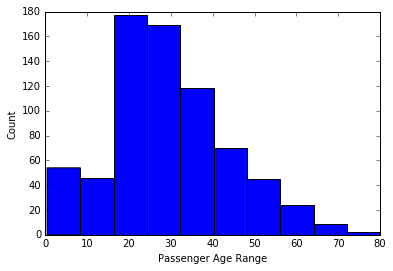

In [70]:
%pylab inline
plt.hist(titanic_dataframe['Age'].dropna())
plt.xlabel("Passenger Age Range")
plt.ylabel("Count")

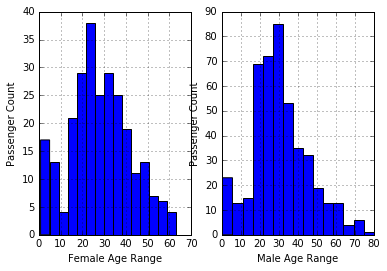

In [71]:
fig = plt.figure()
fig = plt.figure()
fig2 = subplot(1,2,1)
plt.xlabel("Female Age Range")
plt.ylabel("Passenger Count")
titanic_dataframe[titanic_dataframe['Sex']=="female"]['Age'].hist(bins=15)
fig2 = subplot(1,2,2)
titanic_dataframe[titanic_dataframe['Sex']=="male"]['Age'].hist(bins=15)
plt.xlabel("Male Age Range")
plt.ylabel("Passenger Count")

The age distributions for male and female passenges on board are similar. Both are unimodal. Most passengers are adults below 40s. And there are also a few children and senior citizens on abroad.

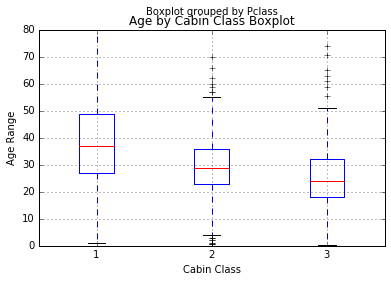

In [67]:
titanic_dataframe.boxplot(column=["Age"],by=["Pclass"])
plt.title("Age by Cabin Class Boxplot")
plt.xlabel("Cabin Class")
plt.ylabel("Age Range")

In [11]:
# How is the average age by class? 
titanic_dataframe.groupby('Pclass')['Age'].mean() 

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Tentative conclusions is: On average, the first class passengers are older than the second class, and the ones in second class are older than the those in the third class.

# what is the survived chance by different age slot?

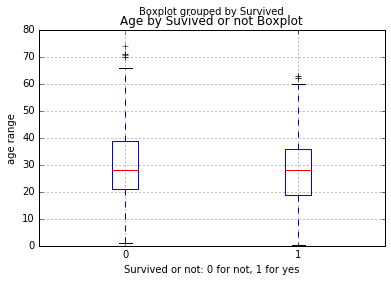

In [65]:
titanic_dataframe.boxplot(column=["Age"],by=["Survived"])
plt.title("Age by Suvived or not Boxplot")
plt.xlabel("Survived or not: 0 for not, 1 for yes")
plt.ylabel("age range")
# It's hard to find any clue through the boxplot below.Let's do further analysis.

In [13]:
# Let me define an age group for different ranges of age.
def age_group(age):
    if age < 18:
        return "underage" 
    if 18 <= age < 60:
        return "adult_mid_age"
    if age >= 60:
        return "senior"  
titanic_dataframe["age_group"] = titanic_dataframe["Age"].apply(age_group)

In [14]:
titanic_dataframe.groupby(["age_group"])["Survived"].mean()

age_group
adult_mid_age    0.386087
senior           0.269231
underage         0.539823
Name: Survived, dtype: float64

It seems children/teenages group (age<18) has a higher rate of survival. And sadly, it seems seniors who are above 60 years old have the smallest chance to survive.

# What is the survived chance by different class?

In [15]:
titanic_dataframe.groupby('Pclass')['Survived'].sum() 

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [16]:
titanic_dataframe.groupby('Pclass')['Survived'].mean() 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

It seems the first class passengers have a much higher change of survival than the second class, also the second class has a higher rate of 
survival than the third class.

# Is it true that women have a higher survival rate than men?

In [17]:
titanic_dataframe.groupby('Sex')['Survived'].mean() # The tentative conclusion is that female has a much higher survival rate than male.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [24]:
female_count = len(titanic_dataframe[titanic_dataframe['Sex']=='female'])
print female_count

314


In [26]:
male_count = len(titanic_dataframe[titanic_dataframe['Sex']=='male'])
print male_count

577


Based on the sample data set, female passengers has 0.74 chance to survive which is much higher than the 0.19 chance to survive of the male passengers.

# How does the survival rates by different class, by sex and by age group look like ?

In [20]:
survived_sum_table = titanic_dataframe.groupby(['Pclass','Sex'])['Survived'].sum()  # The number of passengers survived by Pclass and Sex
print survived_sum_table

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64


In [21]:
survived_rate_table = titanic_dataframe.groupby(['Pclass','Sex'])['Survived'].mean()  # The number of passengers survived by Pclass and Sex
print survived_rate_table

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


Generally speaking, women have a higher chance to survive than men even if they are in the same cabin class. 
For male passengers, if they are in firt class, they have more than twice of the chance to survive than these in second & third classes.

In [22]:
titanic_dataframe.groupby(["Pclass","age_group"])["Survived"].mean()

Pclass  age_group    
1       adult_mid_age    0.675159
        senior           0.294118
        underage         0.916667
2       adult_mid_age    0.417808
        senior           0.250000
        underage         0.913043
3       adult_mid_age    0.202206
        senior           0.200000
        underage         0.371795
Name: Survived, dtype: float64

# Statistical Test 
Although, we generated some tentative conclusions based on means.The significance still needs to be verified by conducting statistical analysis. 

# whether female passengers has higher chance to survive than male.

Although by comparing the mean of survived chance, female is much higher. However, we cannot draw a sound conclusion by only comparing the mean. We need to conduct a statistical test to verify it. 
All the passengers can be divided into two groups: male and female. So the independent variable is the Sex(Female or Male), and the dependent variable is the whether survived or not ( survived denoted by 1, not survived denoted by 0).
Pf as the female survival rate, Pm as the male survival mate.
The female sample size is nf = 314, the male sample size is 577.
I choose alpha = 0.05 as the significance level. 
Null hypothesis: Pf = Pm 
Alternative hypothesis: Pf > Pm

Analyze sample data. Using sample data, we calculate the pooled sample proportion (p) and the standard error (SE). Using those measures, we compute the z-score test statistic (z).

p = (pf * nf + pm * nm) / (nf + nm) = [(0.74 * 314) + (0.19 * 577)] / (314 + 577) = 341/891 = 0.38
SE = sqrt{ 0.38 * ( 1 - 0.38 ) * [ (1/314) + (1/577) ] } = 0.034
z = (0.74 - 0.19) / 0.034 = 0.55/0.034 = 16.15
We saw the z value is super huge which falls out the z table, which means it is in the critical region.Thus, we reject the null hypothesis,and  accept the alternative hypothesis that women have a significantly higher survival rate than men (significance level = 0.05). 

# whether the cabin class has an impact on survival rate

We have two categorical variables (cabin class & survived or not) from the same population.We could use a chi-square test for independence to determine whether cabin class is related to whether survived or not. Variable cabin class has 3 levels ( first class, second class, and third class), variable survived has two levels (survived denoted as 1, not survived denoted as 0).
I choose alpha = 0.05 as the significance level. 
Ho: Cabin class and survived are independent. 
Ha: Cabin class and survived are not independent.

In [33]:
from scipy.stats import chi2_contingency

In [51]:
# contigency table is created by using the groupby function.The frequency count for each cell of the table is above 5.
titanic_dataframe.groupby(['Survived','Pclass'])['Pclass'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

In [53]:
obs = np.array([[80,97,372],[136,87,119]])

In [57]:
chi2_contingency(obs)

(102.88898875696056,
 4.5492517112987927e-23,
 2L,
 array([[ 133.09090909,  113.37373737,  302.53535354],
        [  82.90909091,   70.62626263,  188.46464646]]))

These results indicate that there is statistically significant relationship between the cabin class and whether survived or not (p = 4.5492517112987927e-23).Thus, cabin class can significantly impact the chance of survival.

# whether the cabin class has an impact on survival rate

We have two categorical variables (age group & survived or not) from the same population.We could use a chi-square test for independence to determine whether age group is related to whether survived or not. Variable age group has 3 levels (underage,adult_mid_age and senior), variable survived has two levels (survived denoted as 1, not survived denoted as 0).
I choose alpha = 0.05 as the significance level. 
Ho: Age group and survived are independent. 
Ha: Age group and survived are not independent.

In [60]:
# contigency table is created by using the groupby function.The frequency count for each cell of the table is above 5.
titanic_dataframe.groupby(['Survived','age_group'])['age_group'].count()

Survived  age_group    
0         adult_mid_age    353
          senior            19
          underage          52
1         adult_mid_age    222
          senior             7
          underage          61
Name: age_group, dtype: int64

In [61]:
obs_age = np.array([[353,19,52],[222,7,61]])

In [62]:
chi2_contingency(obs_age)

(11.351868442642676,
 0.0034274654688191105,
 2L,
 array([[ 341.45658263,   15.43977591,   67.10364146],
        [ 233.54341737,   10.56022409,   45.89635854]]))

These results indicate that at sigficance level of 0.05, there is statistically significant relationship between the age group and whether survived or not (p =  0.003).Thus, age group has a significantly impact on the chance of survival.

# Summary

#1:
At an alpha level of 0.05, the three factors would significantly impact your chance of survival: gender, cabin class, age group.
Being a woman, board in a higher class, and being at a younger age group would have a higher chance to survive.

#2:
However there are some limitations of the analysis:
first, the dataset is filled with missing age values. During the age group analysis, I chose to handle these missing values by omitting them. 
second, the statistical tests conducted above are to verify the correlations, they doesn't certainly imply a causation. 
third, there may be other variables not included in the dataset that could have been useful for the analysis. For example, it is reported that ""the starboard side of Titanic struck the iceberg, creating a series of holes below the waterline","The crew had not been trained adequately in carrying out an evacuation.The officers did not know how many they could safely put aboard the lifeboats and launched many of them barely half-full". My guess is that being on which side of the ship may have an impact on the survival rate. Also, if we have data to dive further about the half full life boats, we may find out some sections where the officers are not well trained, probably have a lower survival rate due to the evacuation method. 